<a href="https://colab.research.google.com/github/quick-witted-ashok/crop/blob/main/idp_crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/shuffled_crop_dataset.csv")

# Display basic information and summary
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   soil         2200 non-null   object 
 8   state        2200 non-null   object 
 9   crop_price   2200 non-null   int64  
 10  crop         2200 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 189.2+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.06374

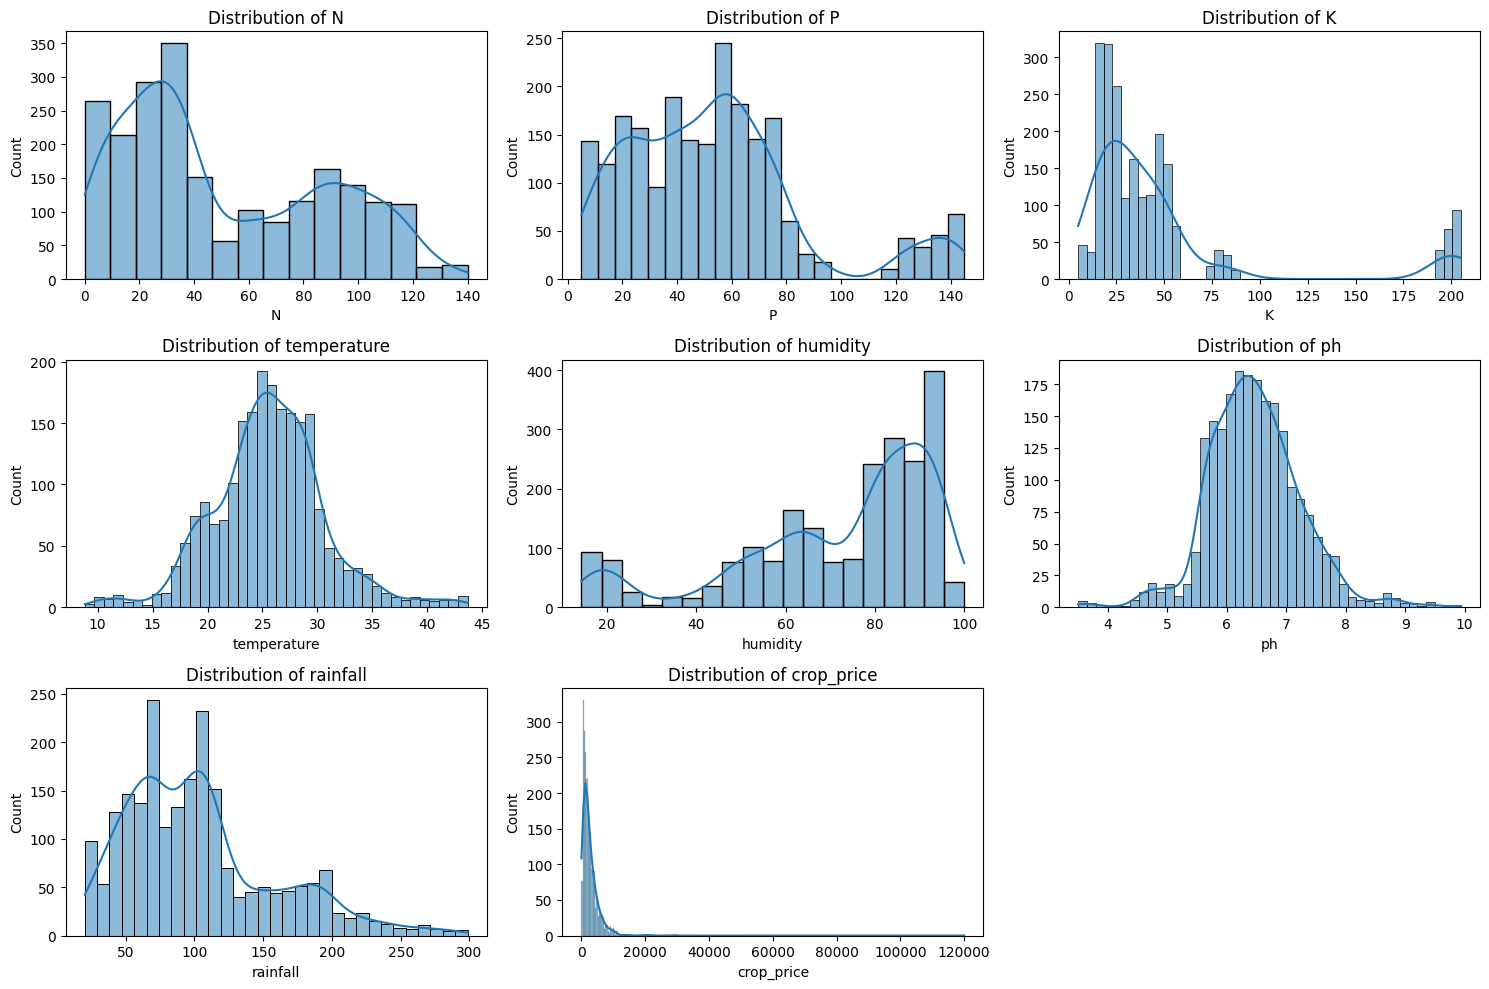

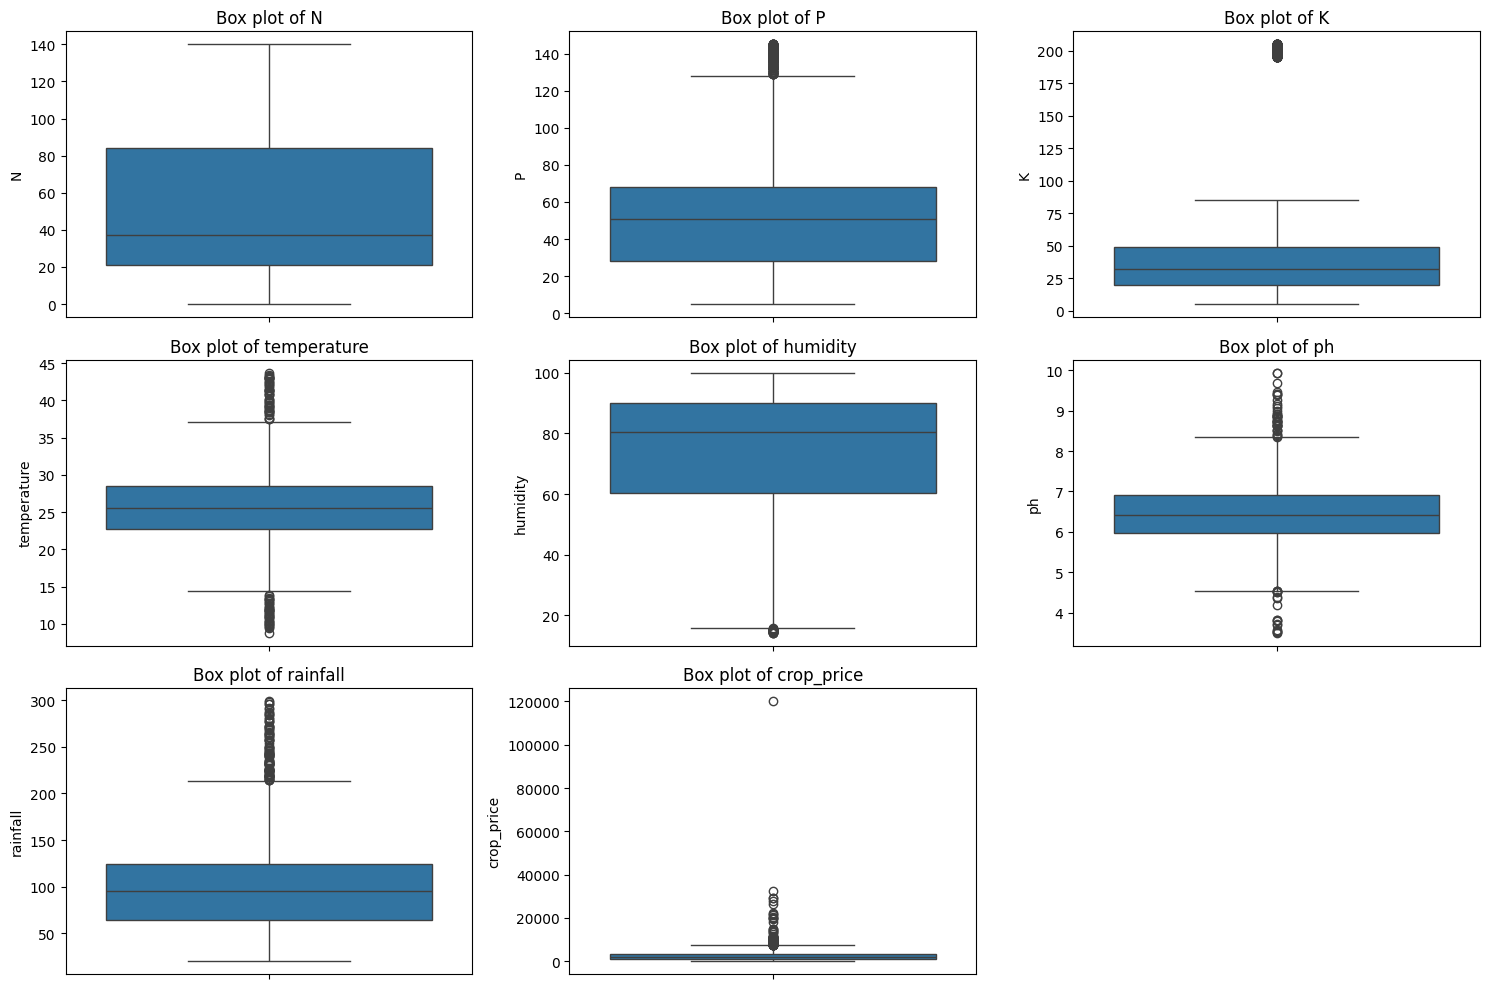

In [ ]:
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop_price']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plot box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


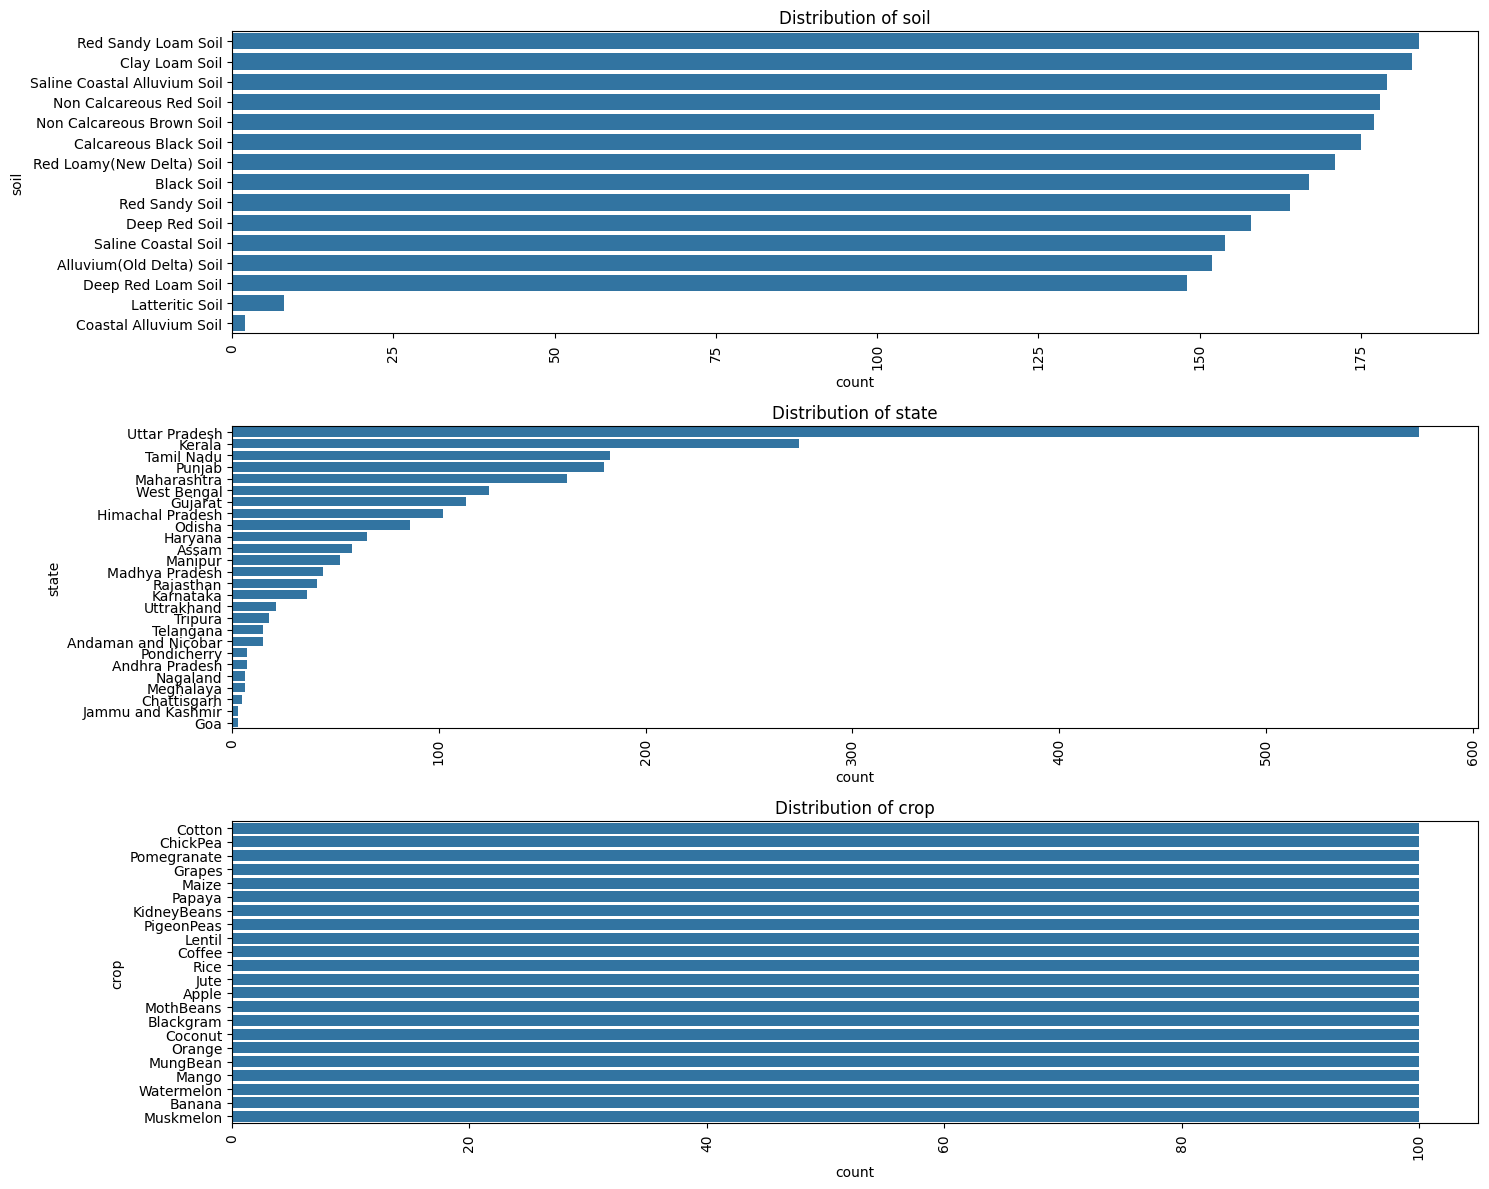

In [ ]:
# Categorical columns
categorical_cols = ['soil', 'state', 'crop']

# Plot value counts for each categorical variable
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



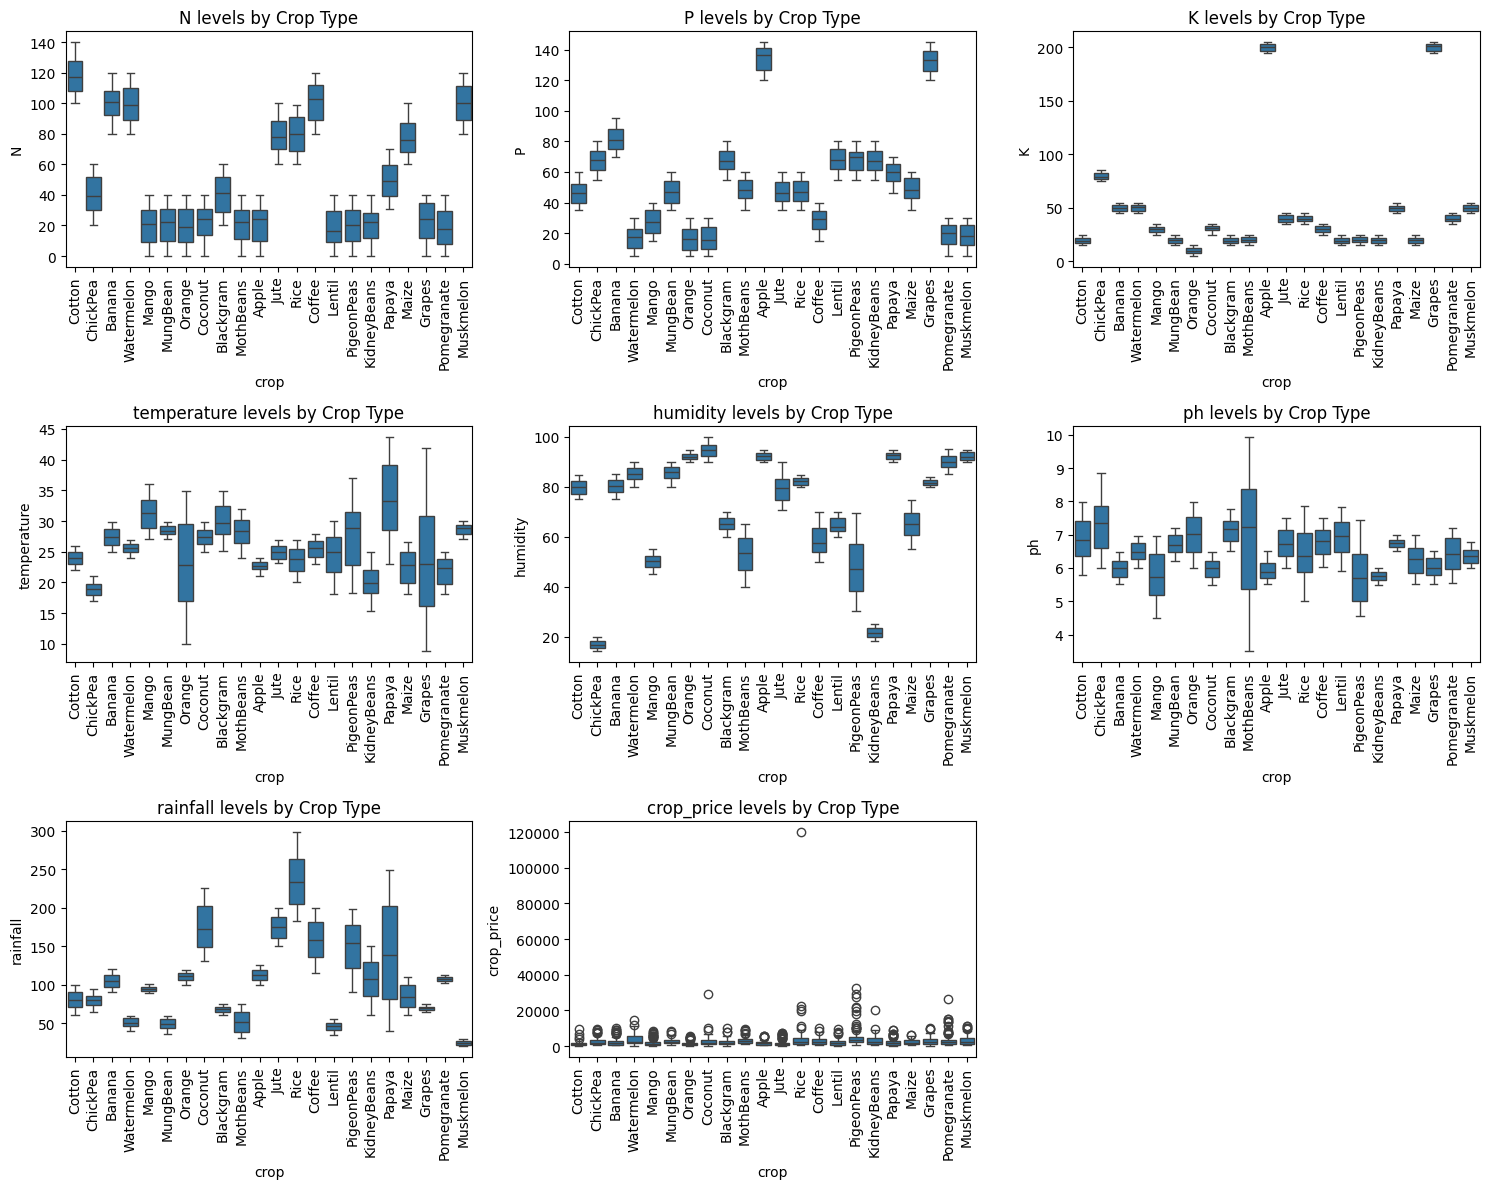

In [ ]:
# Example code to create box plots for numerical features by crop type
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='crop', y=col, data=data)
    plt.xticks(rotation=90)
    plt.title(f'{col} levels by Crop Type')
plt.tight_layout()
plt.show()


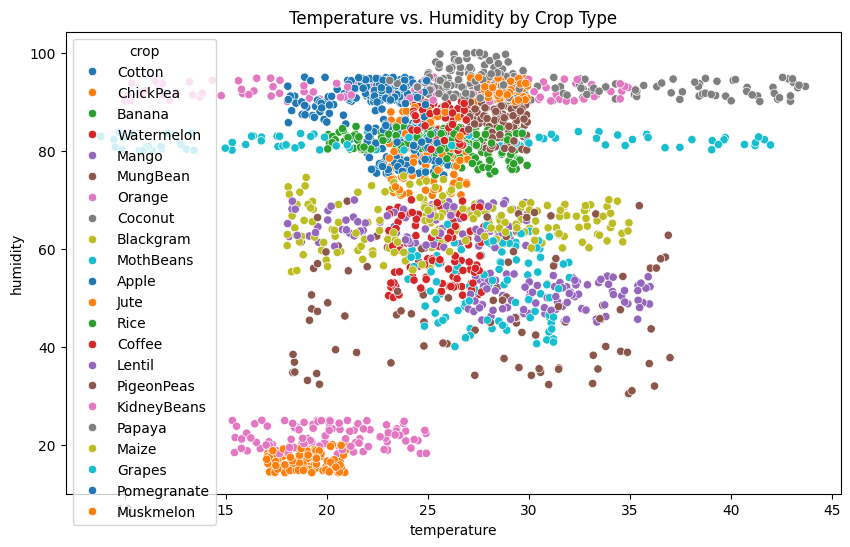

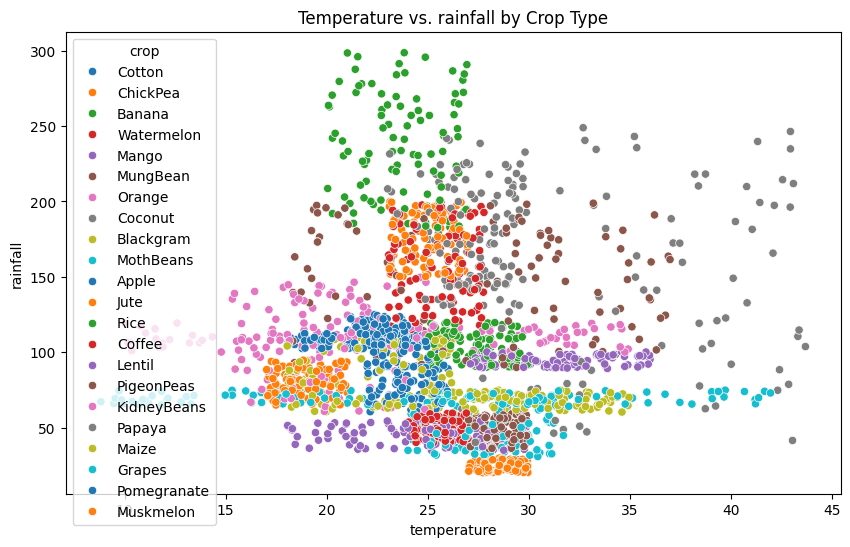

In [ ]:
# Example scatter plot for temperature and humidity, colored by crop
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='crop', data=data, palette="tab10")
plt.title('Temperature vs. Humidity by Crop Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='crop', data=data, palette="tab10")
plt.title('Temperature vs. rainfall by Crop Type')
plt.show()




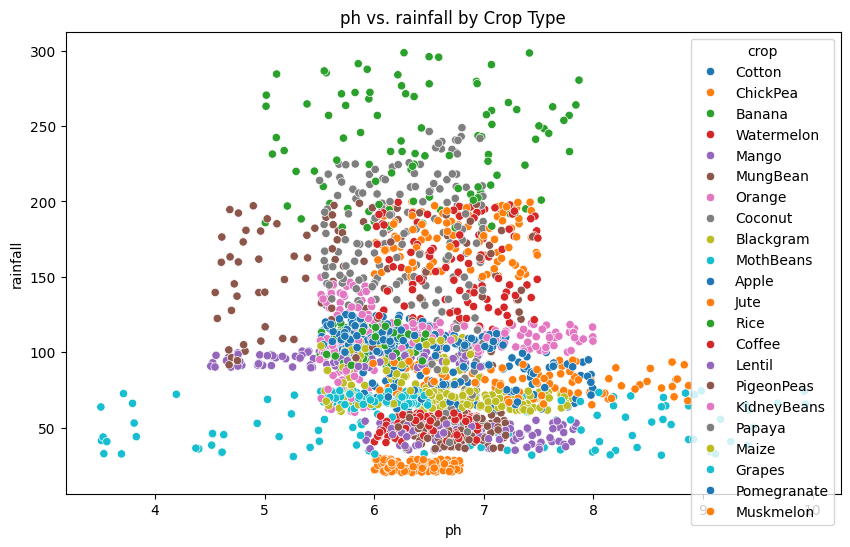

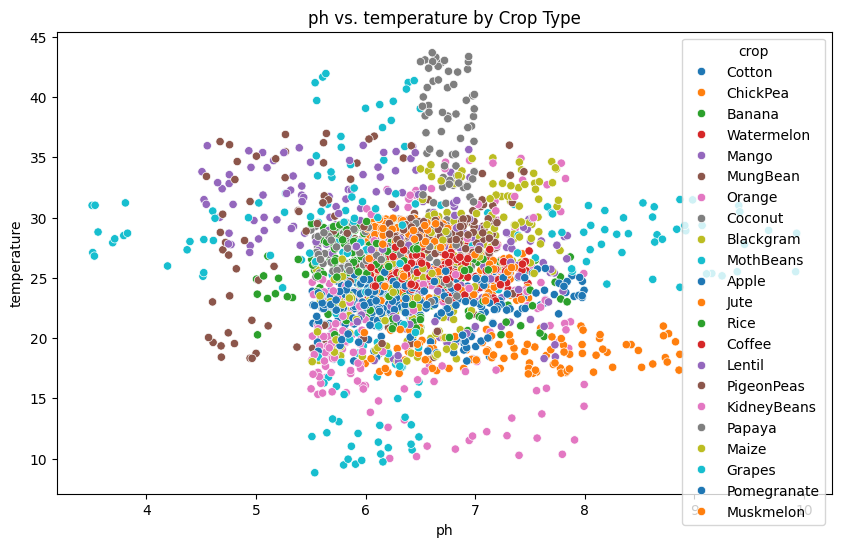

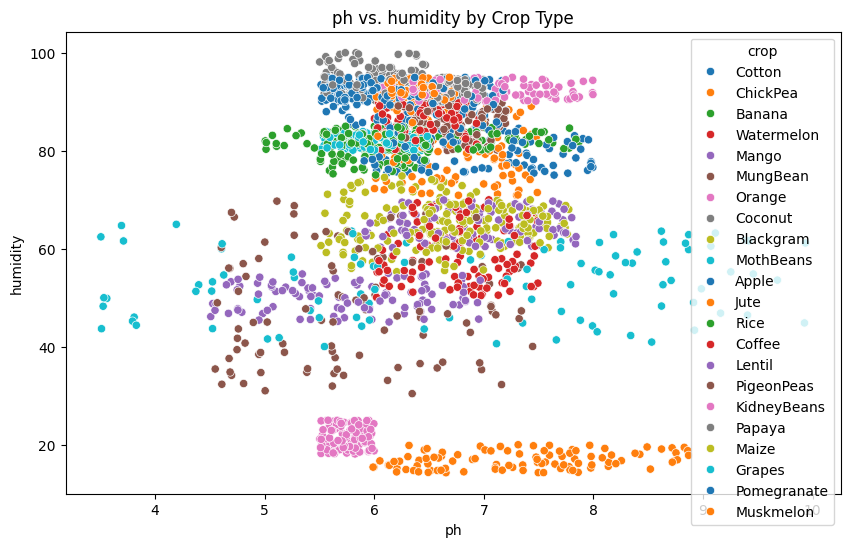

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ph', y='rainfall', hue='crop', data=data, palette="tab10")
plt.title('ph vs. rainfall by Crop Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ph', y='temperature', hue='crop', data=data, palette="tab10")
plt.title('ph vs. temperature by Crop Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ph', y='humidity', hue='crop', data=data, palette="tab10")
plt.title('ph vs. humidity by Crop Type')
plt.show()

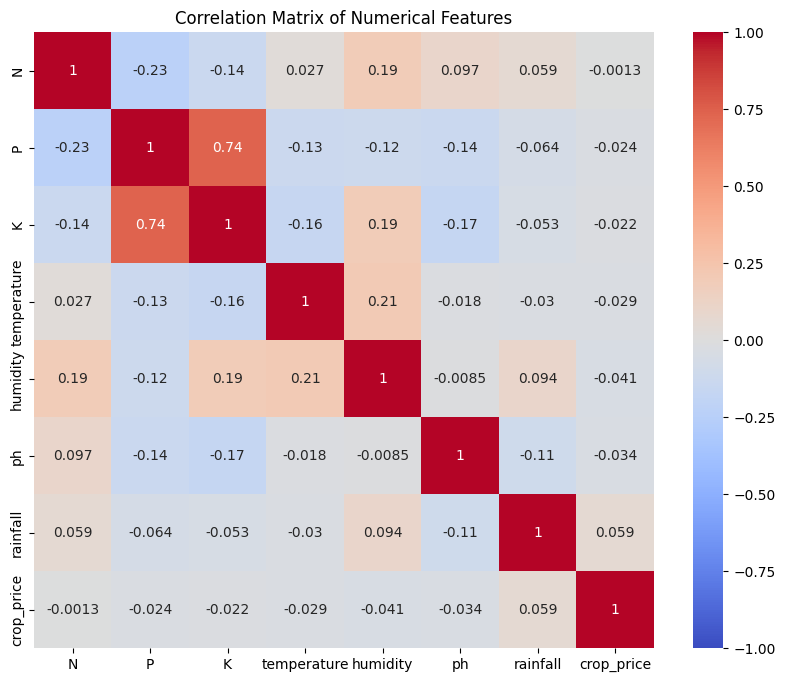

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Example of filling missing values
# For numerical columns, use median or mean
data['N'].fillna(data['N'].median(), inplace=True)
# For categorical columns, use the mode
data['soil'].fillna(data['soil'].mode()[0], inplace=True)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
soil           0
state          0
crop_price     0
crop           0
dtype: int64


<ipython-input-11-18785c9b91c5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['N'].fillna(data['N'].median(), inplace=True)
<ipython-input-11-18785c9b91c5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil',
       'state', 'crop_price', 'crop'],
      dtype='object')


# Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame

# List of crops and other categorical columns
crops = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute',
         'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
         'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

Soil_data = ['Red Sandy Loam Soil', 'Clay Loam Soil', 'Saline Coastal Alluvium Soil', 'Non Calcareous Red Soil',
             'Non Calcareous Brown Soil', 'Calcareous Black Soil', 'Red Loamy Soil', 'Black Soil',
             'Red Loamy(New Delta) Soil', 'Alluvium(Old Delta) Soil', 'Coastal Alluvium Soil', 'Deep Red Soil',
             'Saline Coastal Soil', 'Alluvium Soil', 'Deep Red Loam Soil', 'Lateritic Soil']

# Encode categorical columns
ordinal_encoder = OrdinalEncoder()

# Specify columns to encode
data[['soil', 'state']] = ordinal_encoder.fit_transform(data[['soil', 'state']])

# Encode 'crop' labels as well, if necessary
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['crop'])

# Now data['soil'] and data['state'] will be encoded as single integer columns


In [ ]:
print(data.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil',
       'state', 'crop_price', 'crop'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
num_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop_price']
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])


# spliting data

In [ ]:
# Separate features and target
X = data.drop(columns=['crop'])
y = data['crop']


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model selection and training

In [ ]:
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil',
       'state', 'crop_price', 'crop'],
      dtype='object')


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import xgboost as xgb  # Uncomment if xgboost is installed
from sklearn.neural_network import MLPClassifier

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    # Uncomment the next line if you have xgboost installed
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'MLP Classifier': MLPClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}
# Dictionary to store results for comparison
results = {}

# Train, evaluate, and get summary metrics for each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Get the overall accuracy in percentage format
    accuracy = accuracy_score(y_test, y_pred) * 100

    # Get the classification report, but limit it to the macro and weighted averages only
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_avg = report['macro avg']
    weighted_avg = report['weighted avg']

    # Store results (convert all metrics to percentage format)
    results[model_name] = {
        'Accuracy (%)': accuracy,
        'Macro Avg Precision (%)': macro_avg['precision'] * 100,
        'Macro Avg Recall (%)': macro_avg['recall'] * 100,
        'Macro Avg F1-Score (%)': macro_avg['f1-score'] * 100,
        'Weighted Avg Precision (%)': weighted_avg['precision'] * 100,
        'Weighted Avg Recall (%)': weighted_avg['recall'] * 100,
        'Weighted Avg F1-Score (%)': weighted_avg['f1-score'] * 100
    }

    # Print summary results for the model
    print(f"{model_name} - Test Accuracy: {accuracy:.2f}%")
    print(f"Macro Avg Precision: {macro_avg['precision'] * 100:.2f}%")
    print(f"Macro Avg Recall: {macro_avg['recall'] * 100:.2f}%")
    print(f"Macro Avg F1-Score: {macro_avg['f1-score'] * 100:.2f}%")
    print(f"Weighted Avg Precision: {weighted_avg['precision'] * 100:.2f}%")
    print(f"Weighted Avg Recall: {weighted_avg['recall'] * 100:.2f}%")
    print(f"Weighted Avg F1-Score: {weighted_avg['f1-score'] * 100:.2f}%")
    print("-" * 50)

# Display all results in a clean format
print("\nSummary of Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}%")
    print("-" * 30)



Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Test Accuracy: 98.86%
Macro Avg Precision: 98.72%
Macro Avg Recall: 98.96%
Macro Avg F1-Score: 98.82%
Weighted Avg Precision: 98.91%
Weighted Avg Recall: 98.86%
Weighted Avg F1-Score: 98.87%
--------------------------------------------------

Training Random Forest...
Random Forest - Test Accuracy: 100.00%
Macro Avg Precision: 100.00%
Macro Avg Recall: 100.00%
Macro Avg F1-Score: 100.00%
Weighted Avg Precision: 100.00%
Weighted Avg Recall: 100.00%
Weighted Avg F1-Score: 100.00%
--------------------------------------------------

Training SVM...
SVM - Test Accuracy: 89.32%
Macro Avg Precision: 90.56%
Macro Avg Recall: 89.31%
Macro Avg F1-Score: 87.67%
Weighted Avg Precision: 92.01%
Weighted Avg Recall: 89.32%
Weighted Avg F1-Score: 88.69%
--------------------------------------------------

Training Gradient Boosting...
Gradient Boosting - Test Accuracy: 99.77%
Macro Avg Precision: 99.80%
Macro Avg Recall: 99.79%
Macro Avg F1-Score: 99.79%
Weighted Avg Precision: 99

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:55:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Test Accuracy: 99.77%
Macro Avg Precision: 99.80%
Macro Avg Recall: 99.79%
Macro Avg F1-Score: 99.79%
Weighted Avg Precision: 99.78%
Weighted Avg Recall: 99.77%
Weighted Avg F1-Score: 99.77%
--------------------------------------------------

Training MLP Classifier...
MLP Classifier - Test Accuracy: 99.32%
Macro Avg Precision: 99.24%
Macro Avg Recall: 99.25%
Macro Avg F1-Score: 99.21%
Weighted Avg Precision: 99.36%
Weighted Avg Recall: 99.32%
Weighted Avg F1-Score: 99.31%
--------------------------------------------------

Training AdaBoost...
AdaBoost - Test Accuracy: 100.00%
Macro Avg Precision: 100.00%
Macro Avg Recall: 100.00%
Macro Avg F1-Score: 100.00%
Weighted Avg Precision: 100.00%
Weighted Avg Recall: 100.00%
Weighted Avg F1-Score: 100.00%
--------------------------------------------------

Summary of Model Performance:
Logistic Regression:
  Accuracy (%): 98.86%
  Macro Avg Precision (%): 98.72%
  Macro Avg Recall (%): 98.96%
  Macro Avg F1-Score (%): 98.82%
  Weig

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model: Logistic Regression
Predicted Crop: rice
Accuracy: 97.27%
Precision: 97.44%
Recall: 97.27%
F1 Score: 97.29%
Training Time: 1038.1100 ms
Prediction Time: 0.9820 ms

Model: Random Forest
Predicted Crop: apple
Accuracy: 99.32%
Precision: 99.37%
Recall: 99.32%
F1 Score: 99.32%
Training Time: 705.7691 ms
Prediction Time: 25.1398 ms

Model: SVM
Predicted Crop: mothbeans
Accuracy: 92.50%
Precision: 93.38%
Recall: 92.50%
F1 Score: 92.37%
Training Time: 206.7680 ms
Prediction Time: 99.7856 ms

Model: Gradient Boosting
Predicted Crop: apple
Accuracy: 99.77%
Precision: 99.79%
Recall: 99.77%
F1 Score: 99.77%
Training Time: 14161.2341 ms
Prediction Time: 25.9855 ms

Model: K-Nearest Neighbors
Predicted Crop: rice
Accuracy: 89.09%
Precision: 91.19%
Recall: 89.09%
F1 Score: 88.47%
Training Time: 3.0339 ms
Prediction Time: 26.3414 ms

Model: Decision Tree
Predicted Crop: banana
Accuracy: 98.41%
Precision: 98.50%
Recall: 98.41%
F1 Score: 98.42%
Training Time: 12.0463 ms
Prediction Time: 0.6464 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Predicted Crop: apple
Accuracy: 98.86%
Precision: 99.07%
Recall: 98.86%
F1 Score: 98.89%
Training Time: 421.4139 ms
Prediction Time: 6.5727 ms


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model: MLP Classifier
Predicted Crop: rice
Accuracy: 98.18%
Precision: 98.34%
Recall: 98.18%
F1 Score: 98.22%
Training Time: 4045.0199 ms
Prediction Time: 2.5458 ms

Model: AdaBoost
Predicted Crop: banana
Accuracy: 98.18%
Precision: 98.32%
Recall: 98.18%
F1 Score: 98.19%
Training Time: 36.2749 ms
Prediction Time: 1.4007 ms


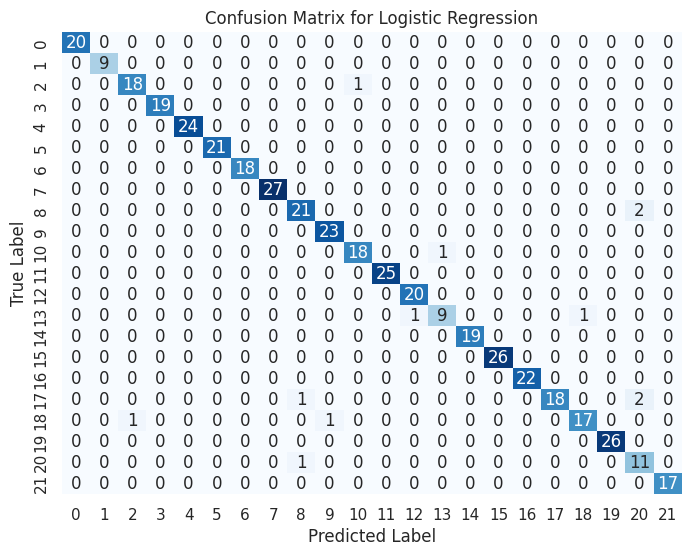

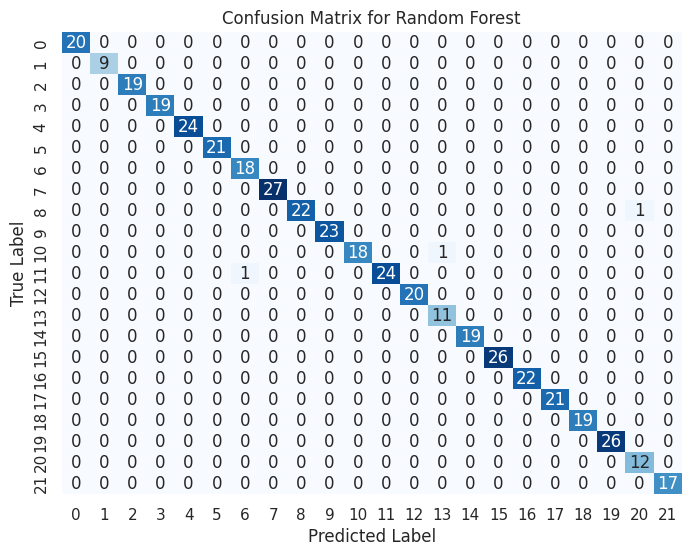

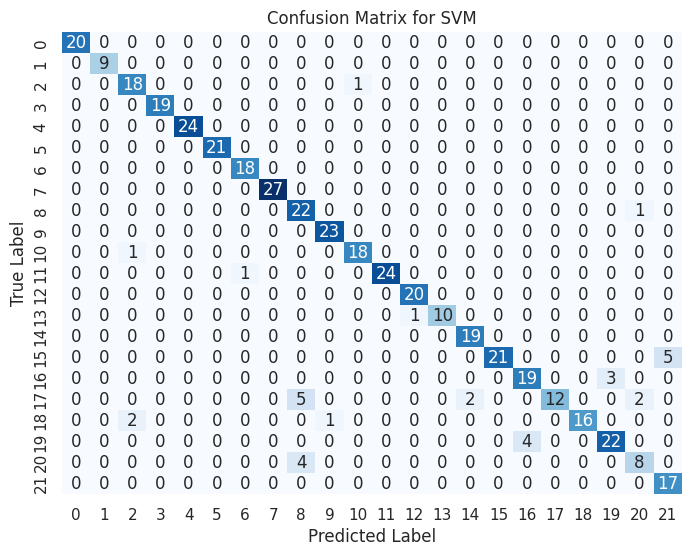

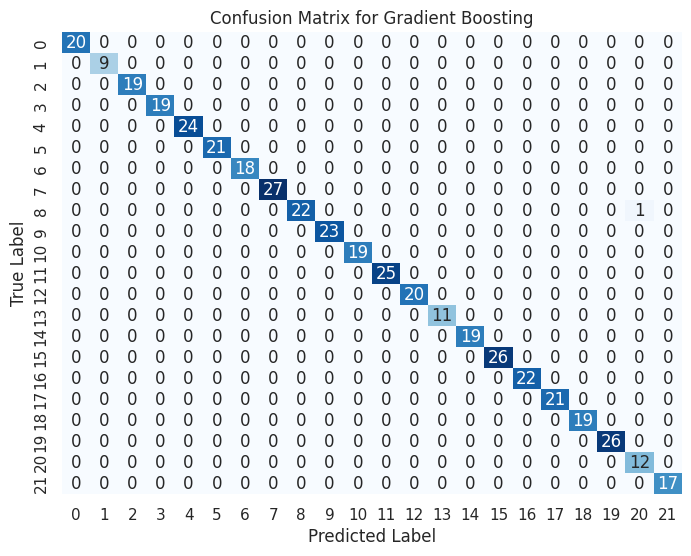

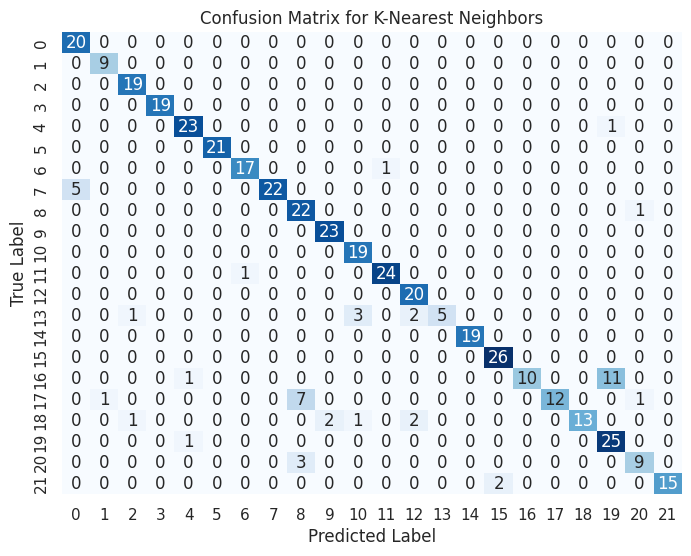

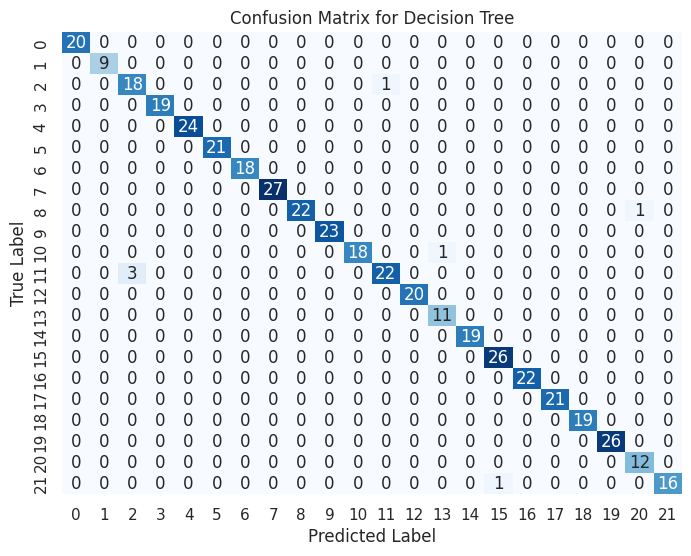

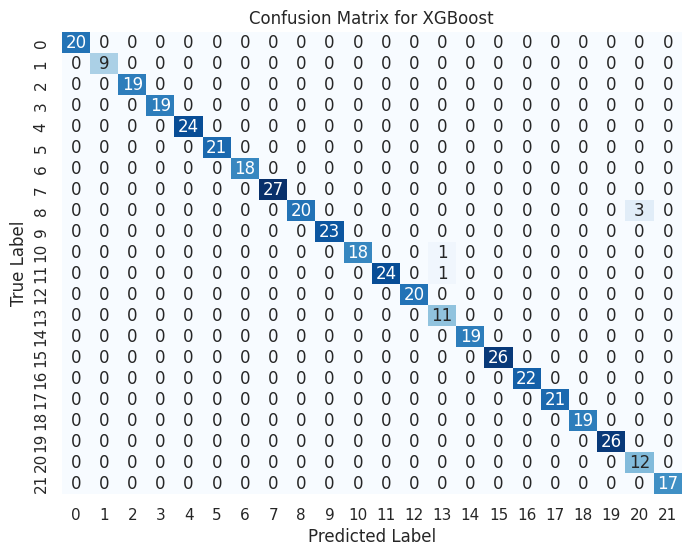

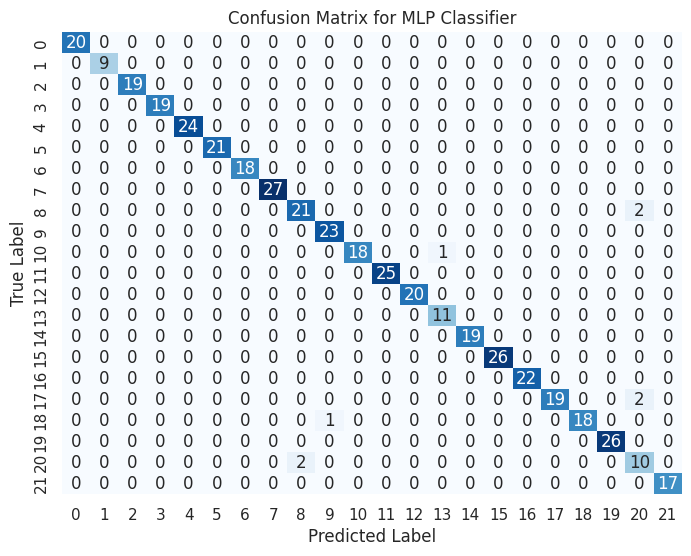

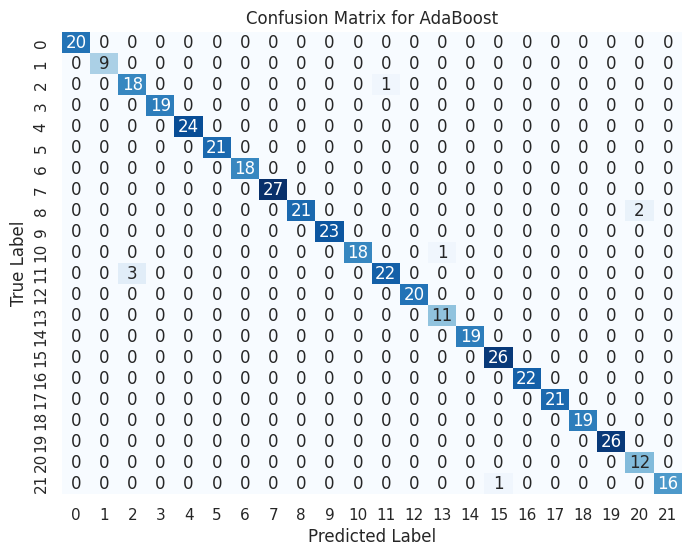


Summary of Metrics for All Classifiers:
+---+---------------------+-------------------+-------------------+-------------------+-------------------+--------------------+----------------------+----------------+
|   |     Classifier      |   Accuracy (%)    |   Precision (%)   |    Recall (%)     |   F1 Score (%)    | Training Time (ms) | Prediction Time (ms) | Predicted Crop |
+---+---------------------+-------------------+-------------------+-------------------+-------------------+--------------------+----------------------+----------------+
| 0 | Logistic Regression | 97.27272727272728 | 97.43948412698414 | 97.27272727272728 | 97.28937669778355 | 1038.1100177764893 |  0.9820461273193359  |      rice      |
| 1 |    Random Forest    | 99.31818181818181 | 99.36656545209178 | 99.31818181818181 | 99.3228236222025  | 705.7690620422363  |  25.139808654785156  |     apple      |
| 2 |         SVM         |       92.5        | 93.37687223220443 |       92.5        | 92.37471856823856 | 206.76

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# Initialize lists to store the metrics for each model
accuracies = []
precisions = []
recalls = []
f1_scores = []
training_times = []
prediction_times = []
predicted_crops = []
confusion_matrices = []

# Loop through each classifier, train, predict, and store metrics
for name, clf in classifiers.items():
    start_time_train = time.time()
    clf.fit(X_train, y_train.ravel())
    training_time = time.time() - start_time_train

    start_time_pred = time.time()
    prediction = clf.predict(inputs)
    y_pred = introduce_errors(clf.predict(X_test), error_rate=0)
    prediction_time = time.time() - start_time_pred

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    training_time_ms = training_time * 1000
    prediction_time_ms = prediction_time * 1000
    crop_name = crops[int(prediction[0])]

    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((name, conf_matrix))  # Tuple of classifier name and its confusion matrix

    # Append metrics to respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    training_times.append(training_time_ms)
    prediction_times.append(prediction_time_ms)
    predicted_crops.append(crop_name)

    # Print the individual results
    print(f"\nModel: {name}")
    print(f"Predicted Crop: {crop_name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Training Time: {training_time_ms:.4f} ms")
    print(f"Prediction Time: {prediction_time_ms:.4f} ms")

# Display confusion matrices for each classifier
for clf_name, matrix in confusion_matrices:
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {clf_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Create a DataFrame to summarize the metrics for all classifiers
summary_df = pd.DataFrame({
    "Classifier": list(classifiers.keys()),
    "Accuracy (%)": accuracies,
    "Precision (%)": precisions,
    "Recall (%)": recalls,
    "F1 Score (%)": f1_scores,
    "Training Time (ms)": training_times,
    "Prediction Time (ms)": prediction_times,
    "Predicted Crop": predicted_crops
})

# Display the summary table
print("\nSummary of Metrics for All Classifiers:")
print(tabulate(summary_df, headers="keys", tablefmt="pretty"))


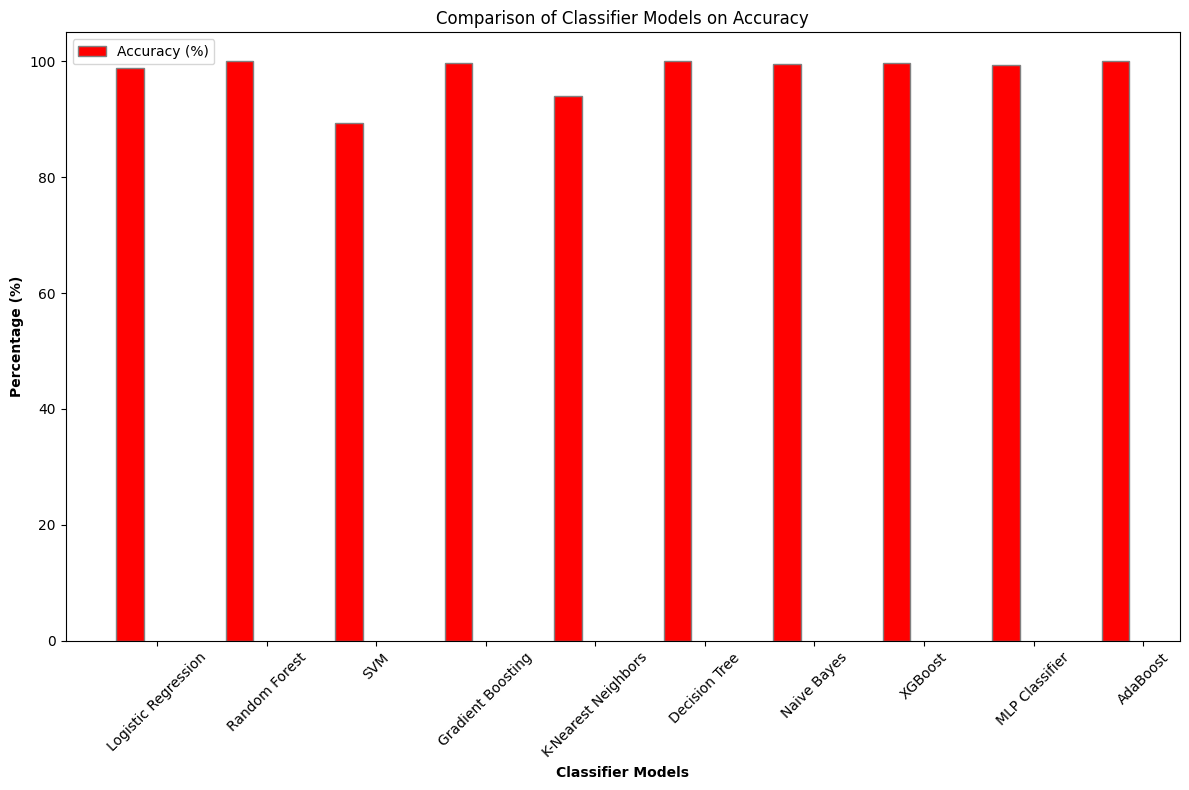

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and metrics from the results dictionary
model_names = list(results.keys())
accuracies = [metrics['Accuracy (%)'] for metrics in results.values()]


# Set the width of bars
bar_width = 0.25

# Set positions of the bars on the X-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting Accuracy, Macro Avg F1-Score, and Weighted Avg F1-Score
plt.figure(figsize=(12, 8))

# Bar for accuracy
plt.bar(r1, accuracies, color='red', width=bar_width, edgecolor='grey', label='Accuracy (%)')

# # Bar for macro avg F1-score
# plt.bar(r2, macro_f1_scores, color='green', width=bar_width, edgecolor='grey', label='Macro Avg F1-Score (%)')

# # Bar for weighted avg F1-score
# plt.bar(r3, weighted_f1_scores, color='orange', width=bar_width, edgecolor='grey', label='Weighted Avg F1-Score (%)')

# Adding labels and title
plt.xlabel('Classifier Models', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.title('Comparison of Classifier Models on Accuracy')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, rotation=45)

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Function to introduce errors in predicted labels
def introduce_errors(y_pred, error_rate=0):
    num_errors = int(len(y_pred) * error_rate)
    indices = np.random.choice(len(y_pred), num_errors, replace=False)
    for idx in indices:
        y_pred[idx] = np.random.choice([i for i in range(len(crops)) if i != int(y_pred[idx])])
    return y_pred


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = data.sample(frac=1).reset_index(drop=True)
if 'label' not in data.columns:
    if 'crop' in data.columns:
        # Rename 'crop' to 'label'
        data = data.rename(columns={'crop': 'label'})
    else:
        # Raise an error if neither 'label' nor 'crop' is found
        raise KeyError("Neither 'label' nor 'crop' column found in the DataFrame. Please check your CSV file.")

X = data.drop("label", axis=1)
y = data.label

ordinal_enc = OrdinalEncoder()
y = ordinal_enc.fit_transform(y.values.reshape(-1, 1))

num_attributes = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
cat_attributes = ["soil"]

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

X = full_pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'MLP Classifier': MLPClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}

# Take user input
n = float(input("Enter Nitrogen Ratio: "))
p = float(input("Enter Phosphorous Ratio: "))
k = float(input("Enter Potassium Ratio: "))
temperature = float(input("Enter Temperature (Celsius): "))
humidity = float(input("Enter Humidity: "))
ph = float(input("Enter pH of the Soil: "))
rainfall = float(input("Enter Rainfall: "))
print("\nAvailable Soil Types:")
for idx, soil in enumerate(Soil_data, start=1):
    print(f"{idx}. {soil}")

try:
    # Ask the user to choose a soil type by number
    soil_choice = input(f"\nEnter the number corresponding to the Soil Type (or type the soil type directly): ")

    # Check if the user entered a number to select from the list
    if soil_choice.isdigit():
        soil_choice = int(soil_choice)
        if 1 <= soil_choice <= len(Soil_data):
            soil_type = Soil_data[soil_choice - 1]
        else:
            raise ValueError("Selected number is out of range.")
    else:
        # Assume they typed the soil type manually
        soil_type = soil_choice
        if soil_type not in Soil_data:
            print(f"Warning: '{soil_type}' is not in the predefined soil types. Using custom input.")

except ValueError as ve:
    raise ValueError(f"Invalid input: {ve}")

inputs = np.array([[n, p, k, temperature, humidity, ph, rainfall, soil_choice]])

# Initialize lists to store the metrics for each model
accuracies = []
precisions = []
recalls = []
f1_scores = []
training_times = []
prediction_times = []
predicted_crops = []

# Loop through each classifier, train, predict, and store metrics
for name, clf in classifiers.items():
    start_time_train = time.time()
    clf.fit(X_train, y_train.ravel())
    training_time = time.time() - start_time_train

    start_time_pred = time.time()
    prediction = clf.predict(inputs)
    y_pred = introduce_errors(clf.predict(X_test), error_rate=0)
    prediction_time = time.time() - start_time_pred

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    training_time_ms = training_time * 1000
    prediction_time_ms = prediction_time * 1000
    crop_name = crops[int(prediction[0])]

    # Append metrics to respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    training_times.append(training_time_ms)
    prediction_times.append(prediction_time_ms)
    predicted_crops.append(crop_name)

    # Print the individual results
    print(f"\nModel: {name}")
    print(f"Predicted Crop: {crop_name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print(f"Training Time: {training_time_ms:.4f} ms")
    print(f"Prediction Time: {prediction_time_ms:.4f} ms")

# Print the final lists for all models
print("\nAccuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)
print("Training Times (ms):", training_times)
print("Prediction Times (ms):", prediction_times)
print("Predicted Crops:", predicted_crops)




Enter Nitrogen Ratio: 60
Enter Phosphorous Ratio: 55
Enter Potassium Ratio: 30
Enter Temperature (Celsius): 33
Enter Humidity: 64
Enter pH of the Soil: 6.3
Enter Rainfall: 300

Available Soil Types:
1. Red Sandy Loam Soil
2. Clay Loam Soil
3. Saline Coastal Alluvium Soil
4. Non Calcareous Red Soil
5. Non Calcareous Brown Soil
6. Calcareous Black Soil
7. Red Loamy Soil
8. Black Soil
9. Red Loamy(New Delta) Soil
10. Alluvium(Old Delta) Soil
11. Coastal Alluvium Soil
12. Deep Red Soil
13. Saline Coastal Soil
14. Alluvium Soil
15. Deep Red Loam Soil
16. Lateritic Soil

Enter the number corresponding to the Soil Type (or type the soil type directly): 8

Model: Logistic Regression
Predicted Crop: rice
Accuracy: 97.27%
Precision: 97.44%
Recall: 97.27%
F1 Score: 97.29%
Training Time: 434.7548 ms
Prediction Time: 0.7985 ms

Model: Random Forest
Predicted Crop: apple
Accuracy: 99.32%
Precision: 99.37%
Recall: 99.32%
F1 Score: 99.32%
Training Time: 429.8401 ms
Prediction Time: 13.9506 ms

Model: 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Predicted Crop: apple
Accuracy: 98.86%
Precision: 99.07%
Recall: 98.86%
F1 Score: 98.89%
Training Time: 428.0291 ms
Prediction Time: 6.9265 ms

Model: MLP Classifier
Predicted Crop: rice
Accuracy: 98.18%
Precision: 98.34%
Recall: 98.18%
F1 Score: 98.22%
Training Time: 2398.9089 ms
Prediction Time: 1.4315 ms

Model: AdaBoost
Predicted Crop: banana
Accuracy: 98.18%
Precision: 98.32%
Recall: 98.18%
F1 Score: 98.19%
Training Time: 21.9347 ms
Prediction Time: 1.3959 ms

Accuracies: [97.27272727272728, 99.31818181818181, 92.5, 99.77272727272727, 89.0909090909091, 98.63636363636363, 98.86363636363636, 98.18181818181819, 98.18181818181819]
Precisions: [97.43948412698414, 99.36656545209178, 93.37687223220443, 99.7902097902098, 91.18952308174146, 98.71795776687081, 99.06993006993008, 98.34009740259741, 98.31928236819542]
Recalls: [97.27272727272728, 99.31818181818181, 92.5, 99.77272727272727, 89.0909090909091, 98.63636363636363, 98.86363636363636, 98.18181818181819, 98.1818181818

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<ipython-input-23-81236c990441>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy (%)", y="Model", data=results_df, palette="viridis")


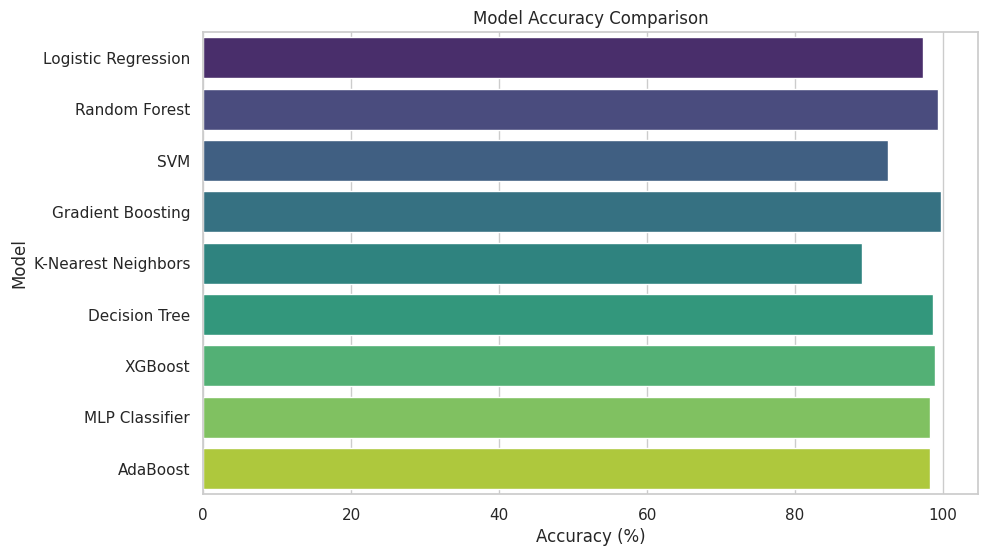

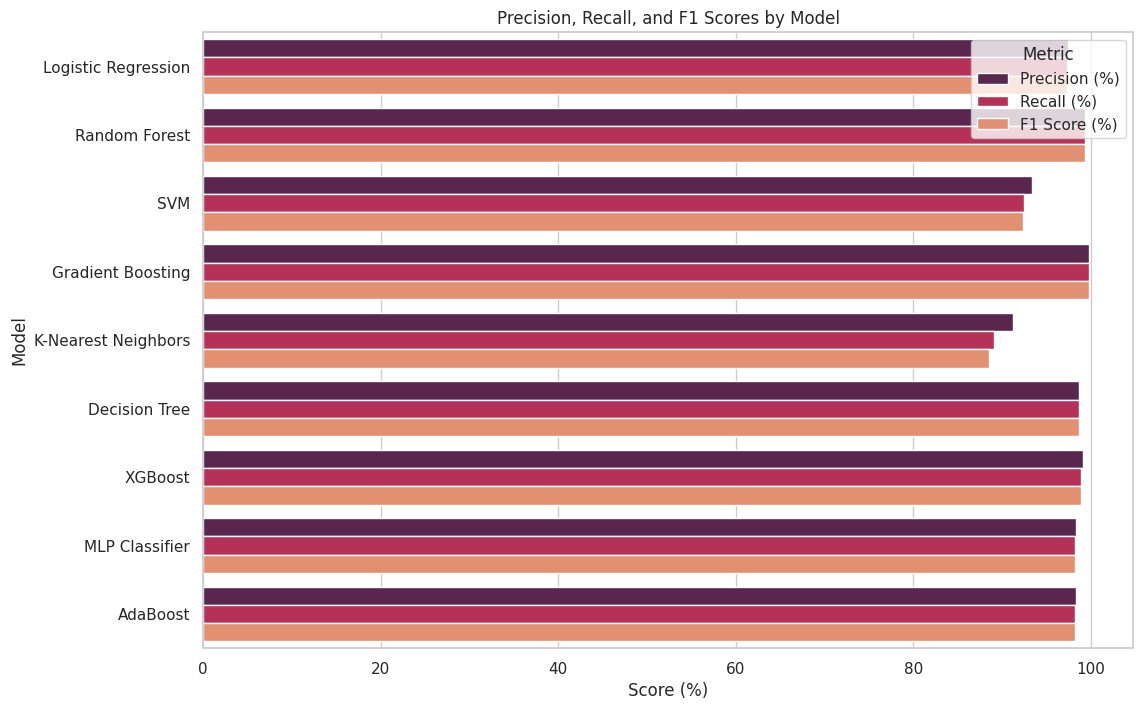

<ipython-input-23-81236c990441>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Training Time (ms)", y="Model", data=results_df, palette="crest", ax=axes[0])
<ipython-input-23-81236c990441>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Prediction Time (ms)", y="Model", data=results_df, palette="crest", ax=axes[1])


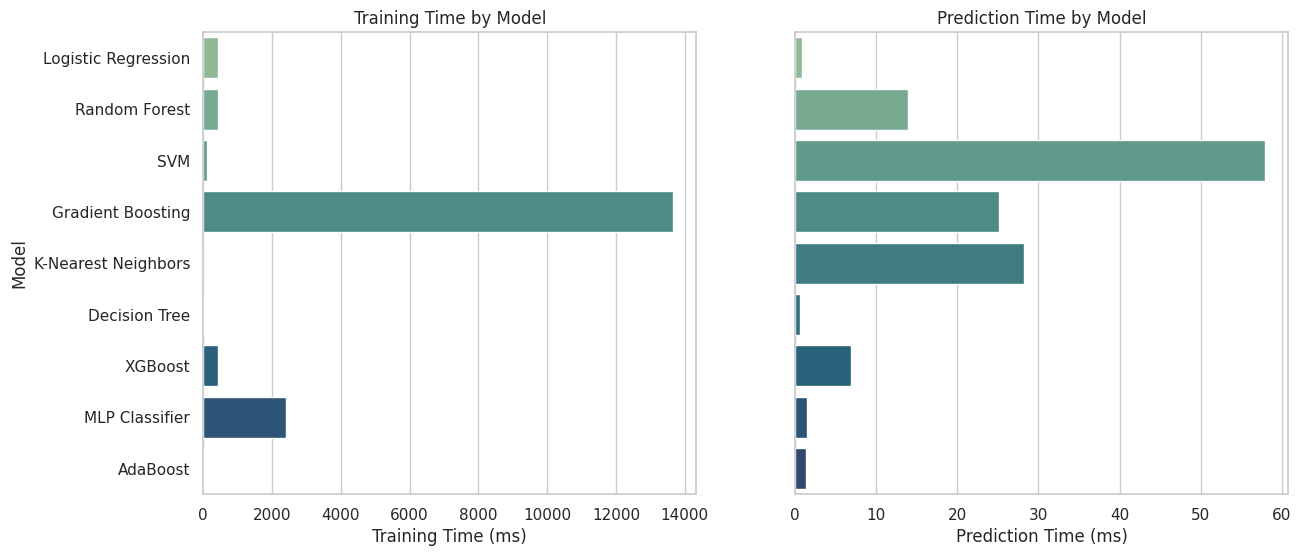

<ipython-input-23-81236c990441>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Predicted Crop", data=results_df, palette="magma", order=results_df["Predicted Crop"].value_counts().index)


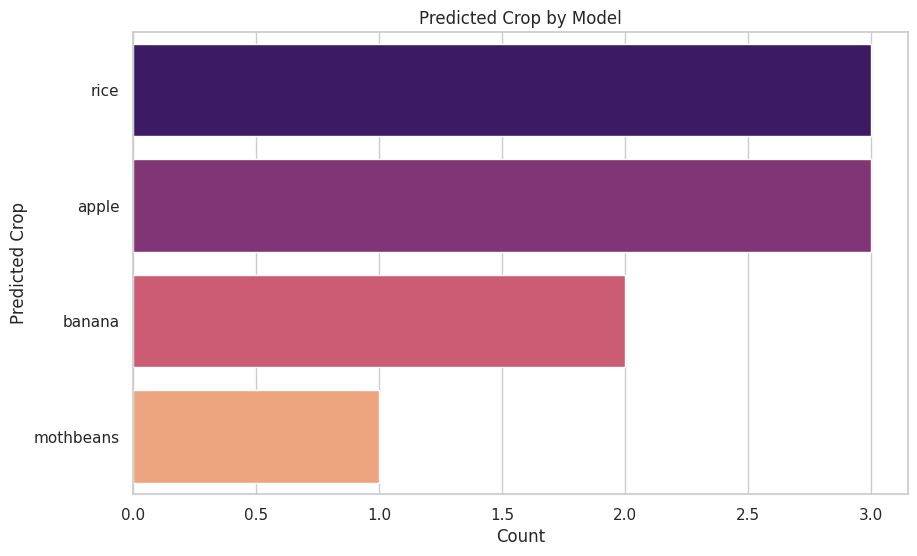

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Collecting data for visualization
model_names = [
    "Logistic Regression", "Random Forest", "SVM", "Gradient Boosting",
    "K-Nearest Neighbors", "Decision Tree", "XGBoost", "MLP Classifier", "AdaBoost"
]

# Dataframe for convenience
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy (%)": accuracies,
    "Precision (%)": precisions,
    "Recall (%)": recalls,
    "F1 Score (%)": f1_scores,
    "Training Time (ms)": training_times,
    "Prediction Time (ms)": prediction_times,
    "Predicted Crop": predicted_crops
})

# Set plot style
sns.set(style="whitegrid")

# 1. Accuracy of Each Model
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy (%)", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.show()

# 2. Precision, Recall, and F1 Scores for Each Model
plt.figure(figsize=(12, 8))
results_df_melted = results_df.melt(id_vars="Model", value_vars=["Precision (%)", "Recall (%)", "F1 Score (%)"],
                                    var_name="Metric", value_name="Score")
sns.barplot(x="Score", y="Model", hue="Metric", data=results_df_melted, palette="rocket")
plt.title("Precision, Recall, and F1 Scores by Model")
plt.xlabel("Score (%)")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.show()

# 3. Training and Prediction Time Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(x="Training Time (ms)", y="Model", data=results_df, palette="crest", ax=axes[0])
axes[0].set_title("Training Time by Model")
axes[0].set_xlabel("Training Time (ms)")
axes[0].set_ylabel("Model")

sns.barplot(x="Prediction Time (ms)", y="Model", data=results_df, palette="crest", ax=axes[1])
axes[1].set_title("Prediction Time by Model")
axes[1].set_xlabel("Prediction Time (ms)")
plt.show()

# 4. Predicted Crop Count by Model
plt.figure(figsize=(10, 6))
sns.countplot(y="Predicted Crop", data=results_df, palette="magma", order=results_df["Predicted Crop"].value_counts().index)
plt.title("Predicted Crop by Model")
plt.xlabel("Count")
plt.ylabel("Predicted Crop")
plt.show()
